In [1]:
#Loading Data Tool Packages
import pandas as pd
import numpy as np

#Packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Packages for datetime conversions
import time
from datetime import datetime as dt

#Machine Learning
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Reading in data
df = pd.read_csv('data.csv')
predf = pd.read_csv('preprocessed_data.csv')
raw_fighter_details_pd = pd.read_csv('raw_fighter_details.csv')
raw_total_fight_pd = pd.read_csv('raw_total_fight_data.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
#grabbing the features or column names
col = df.columns.values
print(col)

#Looking at the data
pd.set_option('display.max_columns', None)


#Looking at the shape
print("Shape of Data: ", df.shape)

#Looking at NA values affecting shape
data = df
data.dropna(how='all').shape
print("Shape of Dropped NA Data: ", df.shape)

['R_fighter' 'B_fighter' 'Referee' 'date' 'location' 'Winner' 'title_bout'
 'weight_class' 'no_of_rounds' 'B_current_lose_streak'
 'B_current_win_streak' 'B_draw' 'B_avg_BODY_att' 'B_avg_BODY_landed'
 'B_avg_CLINCH_att' 'B_avg_CLINCH_landed' 'B_avg_DISTANCE_att'
 'B_avg_DISTANCE_landed' 'B_avg_GROUND_att' 'B_avg_GROUND_landed'
 'B_avg_HEAD_att' 'B_avg_HEAD_landed' 'B_avg_KD' 'B_avg_LEG_att'
 'B_avg_LEG_landed' 'B_avg_PASS' 'B_avg_REV' 'B_avg_SIG_STR_att'
 'B_avg_SIG_STR_landed' 'B_avg_SIG_STR_pct' 'B_avg_SUB_ATT' 'B_avg_TD_att'
 'B_avg_TD_landed' 'B_avg_TD_pct' 'B_avg_TOTAL_STR_att'
 'B_avg_TOTAL_STR_landed' 'B_longest_win_streak' 'B_losses'
 'B_avg_opp_BODY_att' 'B_avg_opp_BODY_landed' 'B_avg_opp_CLINCH_att'
 'B_avg_opp_CLINCH_landed' 'B_avg_opp_DISTANCE_att'
 'B_avg_opp_DISTANCE_landed' 'B_avg_opp_GROUND_att'
 'B_avg_opp_GROUND_landed' 'B_avg_opp_HEAD_att' 'B_avg_opp_HEAD_landed'
 'B_avg_opp_KD' 'B_avg_opp_LEG_att' 'B_avg_opp_LEG_landed'
 'B_avg_opp_PASS' 'B_avg_opp_REV' 'B_avg_opp_S

#### There are plenty of hypotheses to predict whether a fighter can win by submission, stand-up strikers, or etc. We want to see whether kicking or punching rates can predict a fighter to win.

In [4]:
features = ['Winner','B_fighter', 'R_fighter','no_of_rounds','weight_class','B_avg_CLINCH_att','B_avg_CLINCH_landed','B_avg_GROUND_att','B_avg_HEAD_att',
           'B_avg_HEAD_landed','B_avg_LEG_att','B_avg_LEG_landed','B_avg_TOTAL_STR_att','B_avg_TOTAL_STR_landed',
           'R_avg_CLINCH_att','R_avg_CLINCH_landed','R_avg_GROUND_att','R_avg_HEAD_att',
           'R_avg_HEAD_landed','R_avg_LEG_att','R_avg_LEG_landed','R_avg_TOTAL_STR_att','R_avg_TOTAL_STR_landed']
df_features = df[features]
df_features.head()

,Winner,B_fighter,R_fighter,no_of_rounds,weight_class,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed
0,Red,Marlon Moraes,Henry Cejudo,5,Bantamweight,0.200000,0.000000,2.600000,48.600000,11.200000,7.6,5.400000,66.400000,23.600000,17.000000,11.000000,9.400000,74.200000,23.90,5.300000,3.700000,129.900000,69.100000
1,Red,Jessica Eye,Valentina Shevchenko,5,Women's Flyweight,11.800000,7.300000,2.400000,112.000000,32.000000,12.3,10.200000,158.700000,69.600000,9.285714,6.857143,18.428571,84.571429,37.00,19.285714,14.714286,161.571429,102.857143
2,Red,Donald Cerrone,Tony Ferguson,3,Lightweight,6.741935,4.387097,5.516129,67.645161,23.258065,14.0,12.193548,103.709677,52.548387,2.866667,1.733333,5.333333,96.733333,35.60,13.733333,11.200000,133.000000,63.400000
3,Blue,Petr Yan,Jimmie Rivera,3,Bantamweight,13.750000,11.000000,13.000000,116.250000,53.750000,3.0,2.500000,154.750000,86.750000,5.875000,4.125000,1.000000,80.500000,24.00,13.000000,11.500000,117.375000,50.750000
4,Blue,Blagoy Ivanov,Tai Tuivasa,3,Heavyweight,2.500000,2.000000,0.000000,184.500000,45.000000,2.0,2.000000,204.000000,62.000000,11.000000,7.250000,0.500000,50.750000,22.75,3.750000,3.000000,63.500000,32.750000


In [5]:
#Checking NA & Null values
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Winner                  5144 non-null   object 
 1   B_fighter               5144 non-null   object 
 2   R_fighter               5144 non-null   object 
 3   no_of_rounds            5144 non-null   int64  
 4   weight_class            5144 non-null   object 
 5   B_avg_CLINCH_att        3879 non-null   float64
 6   B_avg_CLINCH_landed     3879 non-null   float64
 7   B_avg_GROUND_att        3879 non-null   float64
 8   B_avg_HEAD_att          3879 non-null   float64
 9   B_avg_HEAD_landed       3879 non-null   float64
 10  B_avg_LEG_att           3879 non-null   float64
 11  B_avg_LEG_landed        3879 non-null   float64
 12  B_avg_TOTAL_STR_att     3879 non-null   float64
 13  B_avg_TOTAL_STR_landed  3879 non-null   float64
 14  R_avg_CLINCH_att        4494 non-null   

In [6]:
for i in df_features.keys():
    print('Total Valid Values on Column',i,":",df_features[i].value_counts().sum())

Total Valid Values on Column Winner : 5144
Total Valid Values on Column B_fighter : 5144
Total Valid Values on Column R_fighter : 5144
Total Valid Values on Column no_of_rounds : 5144
Total Valid Values on Column weight_class : 5144
Total Valid Values on Column B_avg_CLINCH_att : 3879
Total Valid Values on Column B_avg_CLINCH_landed : 3879
Total Valid Values on Column B_avg_GROUND_att : 3879
Total Valid Values on Column B_avg_HEAD_att : 3879
Total Valid Values on Column B_avg_HEAD_landed : 3879
Total Valid Values on Column B_avg_LEG_att : 3879
Total Valid Values on Column B_avg_LEG_landed : 3879
Total Valid Values on Column B_avg_TOTAL_STR_att : 3879
Total Valid Values on Column B_avg_TOTAL_STR_landed : 3879
Total Valid Values on Column R_avg_CLINCH_att : 4494
Total Valid Values on Column R_avg_CLINCH_landed : 4494
Total Valid Values on Column R_avg_GROUND_att : 4494
Total Valid Values on Column R_avg_HEAD_att : 4494
Total Valid Values on Column R_avg_HEAD_landed : 4494
Total Valid Val

In [7]:
#Counting null values for each column, axis = 0 for row, 1 for column.
df_features.isnull().sum(axis=0)

Winner                       0
B_fighter                    0
R_fighter                    0
no_of_rounds                 0
weight_class                 0
B_avg_CLINCH_att          1265
B_avg_CLINCH_landed       1265
B_avg_GROUND_att          1265
B_avg_HEAD_att            1265
B_avg_HEAD_landed         1265
B_avg_LEG_att             1265
B_avg_LEG_landed          1265
B_avg_TOTAL_STR_att       1265
B_avg_TOTAL_STR_landed    1265
R_avg_CLINCH_att           650
R_avg_CLINCH_landed        650
R_avg_GROUND_att           650
R_avg_HEAD_att             650
R_avg_HEAD_landed          650
R_avg_LEG_att              650
R_avg_LEG_landed           650
R_avg_TOTAL_STR_att        650
R_avg_TOTAL_STR_landed     650
dtype: int64

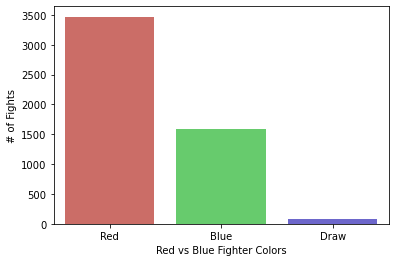

In [8]:
#Print out histogram looking at the relationship between Red and Blue fighters
colors = ["pale red","windows blue"]
sns.countplot(x = "Winner", data = df_features, palette ="hls")
plt.xlabel("Red vs Blue Fighter Colors")
plt.ylabel("# of Fights")
plt.show()
#plt.savefig('histogram.png', dpi=400)

no_of_rounds


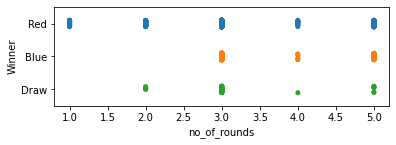

B_avg_CLINCH_att


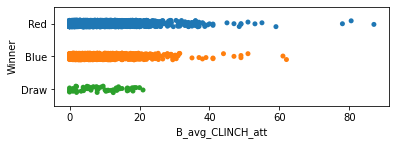

B_avg_CLINCH_landed


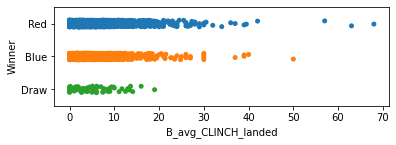

B_avg_GROUND_att


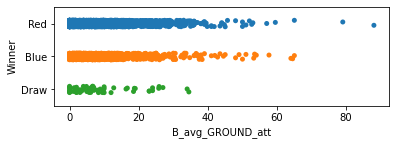

B_avg_HEAD_att


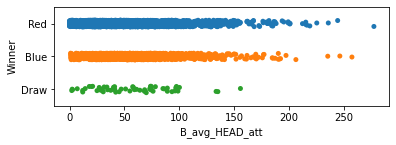

B_avg_HEAD_landed


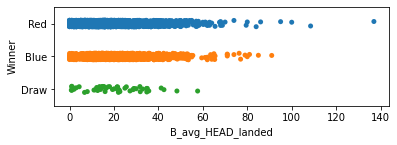

B_avg_LEG_att


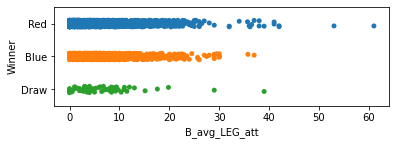

B_avg_LEG_landed


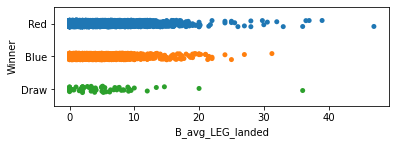

B_avg_TOTAL_STR_att


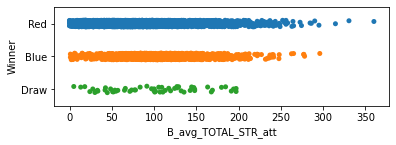

B_avg_TOTAL_STR_landed


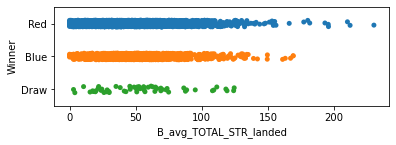

R_avg_CLINCH_att


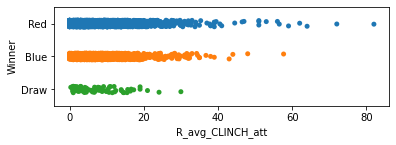

R_avg_CLINCH_landed


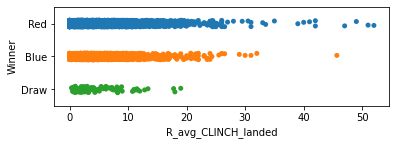

R_avg_GROUND_att


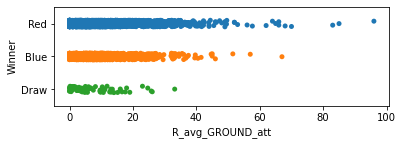

R_avg_HEAD_att


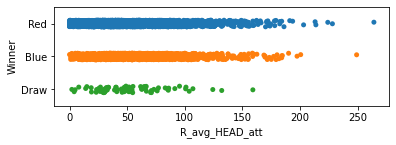

R_avg_HEAD_landed


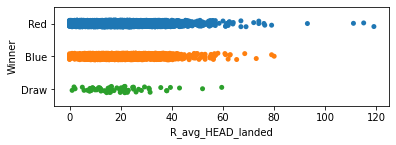

R_avg_LEG_att


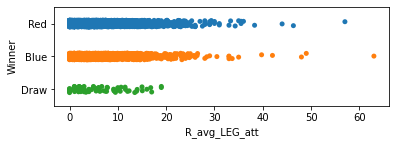

R_avg_LEG_landed


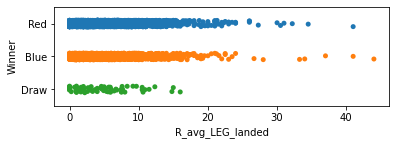

R_avg_TOTAL_STR_att


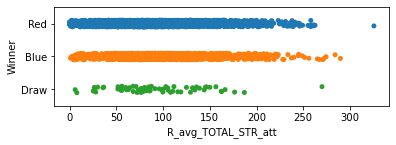

R_avg_TOTAL_STR_landed


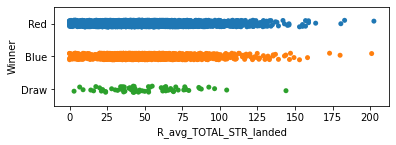

In [9]:
def graphStripPlot(y,x,data):
    plt.subplot(2,1,1)
    sns.stripplot(y=y, x=x, data = data)
    #plt.savefig('stripplot.png',dpi=400)

    # Display the plot
    plt.show()

    #sns.swarmplot(y=y,x=x,data=data)
    #plt.savefig('swarmplot.png', dpi=400)
    
df_features_values = df_features.drop(['Winner', 'weight_class','B_fighter','R_fighter'], axis=1)

for i in df_features_values.columns.values:
    print(i)
    graphStripPlot('Winner',i,df_features)

In [10]:
df_features.corr(method = 'pearson').abs()

,no_of_rounds,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed
no_of_rounds,1.000000,0.049674,0.054784,0.092027,0.114554,0.140750,0.070661,0.071578,0.118225,0.119658,0.108087,0.117372,0.137721,0.162908,0.214398,0.122378,0.123888,0.167181,0.172237
B_avg_CLINCH_att,0.049674,1.000000,0.967093,0.080619,0.403465,0.459308,0.333674,0.357057,0.511074,0.543678,0.032439,0.023257,0.057283,0.056630,0.050435,0.032978,0.025617,0.054426,0.030041
B_avg_CLINCH_landed,0.054784,0.967093,1.000000,0.080381,0.350151,0.434938,0.334875,0.366921,0.477797,0.546242,0.030550,0.022202,0.053814,0.061158,0.057892,0.040552,0.031250,0.058573,0.033159
B_avg_GROUND_att,0.092027,0.080619,0.080381,1.000000,0.119382,0.288477,0.072960,0.069720,0.273377,0.431526,0.013387,0.017206,0.097254,0.013434,0.004084,0.012139,0.014592,0.017777,0.051543
B_avg_HEAD_att,0.114554,0.403465,0.350151,0.119382,1.000000,0.893691,0.440697,0.443236,0.892629,0.631538,0.060634,0.065612,0.034895,0.206742,0.192427,0.114912,0.114902,0.187025,0.122310
B_avg_HEAD_landed,0.140750,0.459308,0.434938,0.288477,0.893691,1.000000,0.339318,0.360421,0.831143,0.719537,0.064352,0.071924,0.020044,0.195300,0.201215,0.112231,0.114058,0.175066,0.122255
B_avg_LEG_att,0.070661,0.333674,0.334875,0.072960,0.440697,0.339318,1.000000,0.979670,0.519490,0.421708,0.048589,0.047805,0.028741,0.146795,0.139582,0.089556,0.084231,0.141463,0.102447
B_avg_LEG_landed,0.071578,0.357057,0.366921,0.069720,0.443236,0.360421,0.979670,1.000000,0.520593,0.438782,0.045171,0.045359,0.027392,0.139337,0.137105,0.086955,0.081980,0.135665,0.101316
B_avg_TOTAL_STR_att,0.118225,0.511074,0.477797,0.273377,0.892629,0.831143,0.519490,0.520593,1.000000,0.894563,0.061914,0.064193,0.003749,0.188845,0.182211,0.097471,0.095089,0.182397,0.133212
B_avg_TOTAL_STR_landed,0.119658,0.543678,0.546242,0.431526,0.631538,0.719537,0.421708,0.438782,0.894563,1.000000,0.051469,0.053975,0.043072,0.129911,0.142559,0.061720,0.058870,0.135804,0.116612


B_avg_LEG_att        B_avg_LEG_landed          0.979670
R_avg_LEG_att        R_avg_LEG_landed          0.976535
R_avg_CLINCH_att     R_avg_CLINCH_landed       0.969151
B_avg_CLINCH_att     B_avg_CLINCH_landed       0.967093
B_avg_TOTAL_STR_att  B_avg_TOTAL_STR_landed    0.894563
B_avg_HEAD_att       B_avg_HEAD_landed         0.893691
                     B_avg_TOTAL_STR_att       0.892629
R_avg_HEAD_att       R_avg_TOTAL_STR_att       0.887625
R_avg_TOTAL_STR_att  R_avg_TOTAL_STR_landed    0.879656
R_avg_HEAD_att       R_avg_HEAD_landed         0.870880
dtype: float64


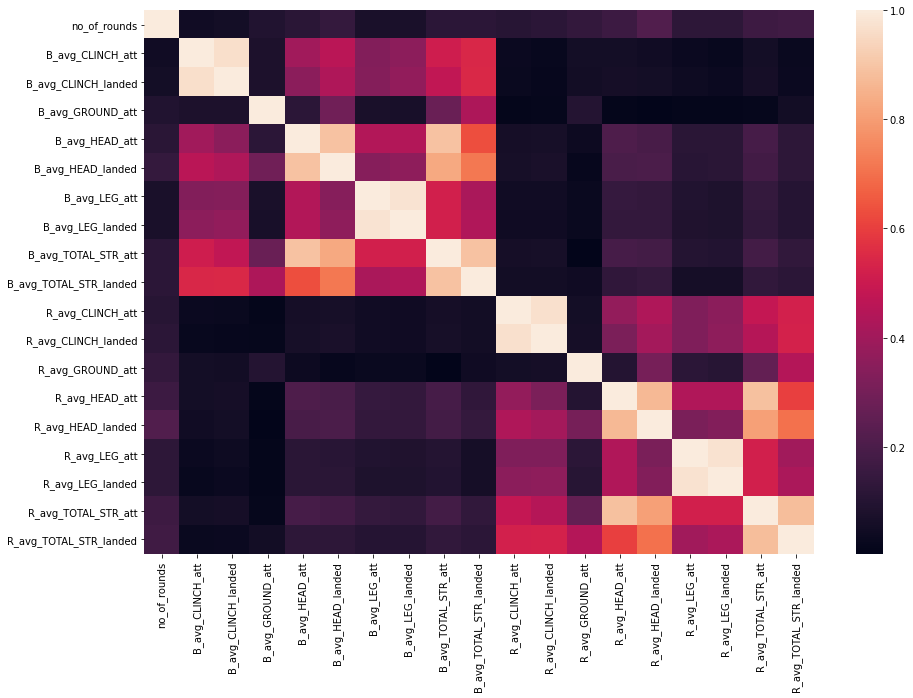

In [11]:
corr_matrix = df_features.corr(method = 'pearson').abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                 .astype(np.bool))
                 .stack()
                 .sort_values(ascending=False)
      )
print(sol[0:10])

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [12]:
#Mapping
#Setting up Dictionary for Mapping
winners_dict = {}
winners_dictR = {}

winners_dict_uni = df_features.Winner.unique()

print(winners_dict_uni)

for i in range(len(winners_dict_uni)):
    winners_dict[i] = winners_dict_uni[i]
    winners_dictR[winners_dict_uni[i]] = i
print(winners_dictR)

df_features['WinnerNumber'] = df_features['Winner']
df_features['WinnerNumber'] = df_features['WinnerNumber'].map(winners_dictR)
#print(df_features.WinnerNumber)

df_features.WinnerNumber.head()

['Red' 'Blue' 'Draw']
{'Red': 0, 'Blue': 1, 'Draw': 2}


C:\Users\chappie\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\chappie\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0    0
1    0
2    0
3    1
4    1
Name: WinnerNumber, dtype: int64

In [13]:
#Getting rid of draws
df_features = df_features[df_features.WinnerNumber != 2]

In [14]:
#df_features = df_features.apply (pd.to_numeric, errors='coerce')
df_features = df_features.dropna()
#df_features = df_features.reset_index(drop=True)
df_features.head(10)

,Winner,B_fighter,R_fighter,no_of_rounds,weight_class,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,WinnerNumber
0,Red,Marlon Moraes,Henry Cejudo,5,Bantamweight,0.200000,0.000000,2.600000,48.600000,11.200000,7.600000,5.400000,66.400000,23.600000,17.000000,11.000000,9.400000,74.200000,23.900000,5.300000,3.700000,129.900000,69.100000,0
1,Red,Jessica Eye,Valentina Shevchenko,5,Women's Flyweight,11.800000,7.300000,2.400000,112.000000,32.000000,12.300000,10.200000,158.700000,69.600000,9.285714,6.857143,18.428571,84.571429,37.000000,19.285714,14.714286,161.571429,102.857143,0
2,Red,Donald Cerrone,Tony Ferguson,3,Lightweight,6.741935,4.387097,5.516129,67.645161,23.258065,14.000000,12.193548,103.709677,52.548387,2.866667,1.733333,5.333333,96.733333,35.600000,13.733333,11.200000,133.000000,63.400000,0
3,Blue,Petr Yan,Jimmie Rivera,3,Bantamweight,13.750000,11.000000,13.000000,116.250000,53.750000,3.000000,2.500000,154.750000,86.750000,5.875000,4.125000,1.000000,80.500000,24.000000,13.000000,11.500000,117.375000,50.750000,1
4,Blue,Blagoy Ivanov,Tai Tuivasa,3,Heavyweight,2.500000,2.000000,0.000000,184.500000,45.000000,2.000000,2.000000,204.000000,62.000000,11.000000,7.250000,0.500000,50.750000,22.750000,3.750000,3.000000,63.500000,32.750000,1
5,Red,Nina Ansaroff,Tatiana Suarez,3,Women's Strawweight,11.833333,7.166667,6.000000,117.833333,42.666667,22.833333,20.166667,183.500000,95.666667,3.000000,2.250000,42.250000,44.750000,31.250000,4.500000,4.000000,101.500000,80.500000,0
6,Red,Pedro Munhoz,Aljamain Sterling,3,Bantamweight,6.083333,3.416667,5.083333,66.583333,24.000000,14.500000,10.083333,102.666667,47.500000,14.000000,11.083333,16.083333,63.000000,23.333333,14.500000,10.666667,138.333333,85.750000,0
7,Blue,Alexa Grasso,Karolina Kowalkiewicz,3,Women's Strawweight,17.500000,11.250000,3.000000,94.250000,29.750000,15.750000,13.000000,165.500000,87.500000,27.555556,20.777778,3.777778,149.000000,46.777778,12.888889,9.222222,211.222222,95.000000,1
8,Blue,Calvin Kattar,Ricardo Lamas,3,Featherweight,1.750000,0.500000,8.750000,122.250000,46.500000,6.000000,5.000000,139.250000,59.000000,7.200000,6.400000,6.933333,45.933333,15.266667,14.133333,10.266667,80.000000,43.533333,1
9,Red,Angela Hill,Yan Xiaonan,3,Women's Strawweight,22.500000,16.800000,2.600000,108.300000,45.300000,12.500000,11.100000,159.000000,85.800000,10.666667,7.333333,1.333333,213.666667,79.000000,33.333333,21.333333,260.666667,109.000000,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [40]:
X = df_features.drop(['Winner', 'weight_class','B_fighter','R_fighter','WinnerNumber'], axis=1)
y = df_features['WinnerNumber']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [41]:
print(X)

      no_of_rounds  B_avg_CLINCH_att  B_avg_CLINCH_landed  B_avg_GROUND_att  \
0                5          0.200000             0.000000          2.600000   
1                5         11.800000             7.300000          2.400000   
2                3          6.741935             4.387097          5.516129   
3                3         13.750000            11.000000         13.000000   
4                3          2.500000             2.000000          0.000000   
...            ...               ...                  ...               ...   
5125             1          0.000000             0.000000          9.000000   
5127             1          1.000000             1.000000          0.000000   
5136             1          0.000000             0.000000          5.500000   
5138             1          0.000000             0.000000          1.000000   
5139             1          9.000000             4.000000          8.000000   

      B_avg_HEAD_att  B_avg_HEAD_landed  B_avg_LEG_

In [42]:
#Preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_train)

Logistic Regression Accuracy Score is: 0.3273942093541203
   0    1
0  3  604
1  0  291





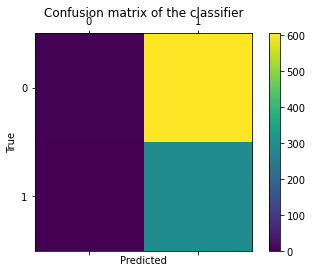

In [43]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
clf = LR.fit(X_scaled, y_train)
y_predict = clf.predict(X_test)
print('Logistic Regression Accuracy Score is:', accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Decision Tree Classifier Accuracy Score is 0.38752783964365256
    0    1
0  89  518
1  32  259





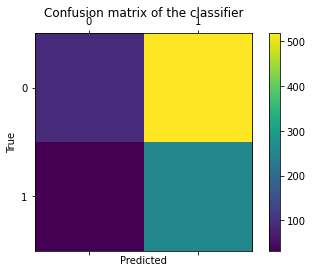

In [44]:
DTC = DecisionTreeClassifier()
DTCfit = DTC.fit(X_scaled, y_train)
y_predict = DTCfit.predict(X_test)
print('Decision Tree Classifier Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Random Forest Classifier Accuracy Score is 0.6570155902004454
     0   1
0  582  25
1  283   8





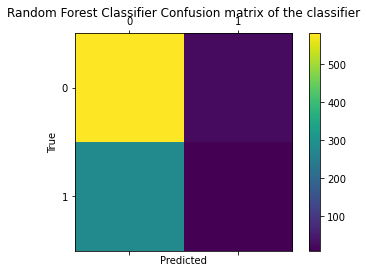

In [47]:
RFC = RandomForestClassifier(n_estimators=50)
RFCfit = RFC.fit(X_scaled, y_train)
y_predict = RFCfit.predict(X_test)
print('Random Forest Classifier Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Random Forest Classifier Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
#Create a series with feature importances:
trainingKeys = X.columns
featureI = pd.Series(RFC.feature_importances_, index=trainingKeys).sort_values(ascending=False)
print(featureI)
featureI = featureI[featureI > 0.05]
print(featureI)

B_avg_HEAD_landed         0.066948
B_avg_HEAD_att            0.063178
B_avg_TOTAL_STR_att       0.058213
R_avg_TOTAL_STR_att       0.057827
R_avg_GROUND_att          0.057100
B_avg_LEG_att             0.056650
R_avg_HEAD_att            0.056379
B_avg_GROUND_att          0.055656
B_avg_TOTAL_STR_landed    0.055364
R_avg_TOTAL_STR_landed    0.054581
R_avg_CLINCH_att          0.054548
R_avg_HEAD_landed         0.054254
R_avg_LEG_landed          0.053671
R_avg_LEG_att             0.051356
B_avg_LEG_landed          0.050486
R_avg_CLINCH_landed       0.049669
B_avg_CLINCH_att          0.049531
B_avg_CLINCH_landed       0.048500
no_of_rounds              0.006088
dtype: float64
B_avg_HEAD_landed         0.066948
B_avg_HEAD_att            0.063178
B_avg_TOTAL_STR_att       0.058213
R_avg_TOTAL_STR_att       0.057827
R_avg_GROUND_att          0.057100
B_avg_LEG_att             0.056650
R_avg_HEAD_att            0.056379
B_avg_GROUND_att          0.055656
B_avg_TOTAL_STR_landed    0.055364
R_avg

Accuracy Score is 0.6447661469933185
     0   1
0  532  75
1  244  47





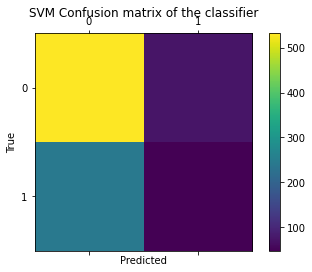

In [48]:
SVMmodel = svm.SVC(kernel='linear', C = 1)
SVMF = SVMmodel.fit(X_scaled, y_train)
y_predict = SVMF.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('SVM Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#plt.plot(confusion_matrix(y_test,y_predict))

In [ ]:
"""# Fit a linear regression model and store the predictions.
from sklearn.linear_model import LinearRegression

features_cols = ['B_avg_TOTAL_STR_att']

#X = df_features.drop(['Winner','B_fighter','R_fighter','weight_class'], axis=1)
X = df_features[features_cols]
y = df_features['WinnerNumber']
#X = dataX[features_cols]
#y = dataX['diagnosis_points']

linreg = LinearRegression()
linreg.fit(X, y)
df_features['winner_pred'] = linreg.predict(X) # prediction via Lin Reg-

# Scatter plot that includes the regression line
plt.scatter(df_features[features_cols], df_features['WinnerNumber'])
plt.plot(df_features[features_cols], df_features['winner_pred'], color='red')
plt.xlabel('')
plt.ylabel('Winner')
plt.savefig('test.png', dpi=400)
#----------------------

df_features['winner_pred_class'] = np.where(df_features['winner_pred'] >= 0.5, 1, 0)
df_features.head()

df_featuresX = df_features.sort_values(features_cols)

plt.scatter(df_featuresX[features_cols], df_featuresX['winner_pred'])

plt.xlabel('Total Attempted Strikes')
plt.ylabel('Winners Prediction')

plt.plot(df_featuresX[features_cols], df_features['winner_pred'], color='red');
plt.savefig('scatter_03_with_line_02.png', dpi=400)
#--------------------------
enc = LabelEncoder()
#-----------------------------
blue_winners = []
for i in range(len(df)):
    winner = df.loc[i,"Winner"]
    #print(winner)
    if winner == "Blue":
        blue_winners.append(df.loc[i])
        
droplist = ['date','location','title_bout','B_current_lose_streak','R_win_by_TKO_Doctor_Stoppage', 'B_current_win_streak']

df = df.drop(droplist2, axis = 1)
#----------------------------------------
for i in df.keys():
    print(i)

pd.set_option('display.max_rows', None)
df.head()

predf.head()

raw_fighter_details_pd.head()

raw_total_fight_pd.head()
"""